# Poceni Pythonska Pojedina
## Seminarska naloga


### Pridobivanje podatkov
Podatke pridobljene s pomo[ch]jo `mercator_scraper.py` in pa `okusno_scraper.py` najprej uvozimo za uporabo pri analizi. Glede enot: [ch]asi so v minutah, dol[zh]ina navodil je v [sh]tevilu znakov. Vse hranilne vrednosti in energijsko vrednost obravnavamo za 100g jedi. Le-ta je v KJ, beljakovine, ma[sh][ch]obe, ogljikovi hidrati in pa vlaknine so v gramih, ter vitamin D je mednarodnih enotah (iu).

In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

recepti = pd.read_csv("data/recepti.csv")
recepti.head()

,Avtorji,Cas priprave,Cas kuhanja,Skupen cas,Dolzina navodil,Energijska vrednost,Beljakovine,Ogljikovi hidrati,Mascobe,Vlaknine,Vitamin D
0,M.J.,15,40,55,1276,315.98,1.80,11.00,2.21,1.36,0.00
1,Su.S.,20,40,60,1290,1260.01,6.38,60.20,2.67,0.74,0.30
2,Sanja Sirk,15,35,50,1525,579.02,15.07,2.62,6.46,0.09,0.00
3,M. J.,10,30,40,1116,145.44,0.16,3.97,1.59,0.24,0.00
4,M. J.,20,90,110,2125,654.54,7.66,9.00,9.33,1.02,0.04


[Zh]e samo iz te tabele lahko izklu[sh]imo veliko informacij, recimo kak[sh]na je odvisnost med [ch]asom kuhanja in pa energijsko vrednostjo jedi? Kaj pa med energijsko vrednostjo ter vsebnostjo raznoraznih hranilnih snovi, npr. ali imajo kalori[ch]no bogatej[sh]e jedi ve[ch] ma[sh][ch]ob? Kaj pa ogljikovih hidratov? Za za[ch]etek si poglejmo pogostost zapletenih receptov in energijsko bogatih jedi.

Povpre[ch]na energijska vrednost je: 901.78445 KJ
Povpre[ch]na dol[zh]ina besedila je: 1208.936 znakov


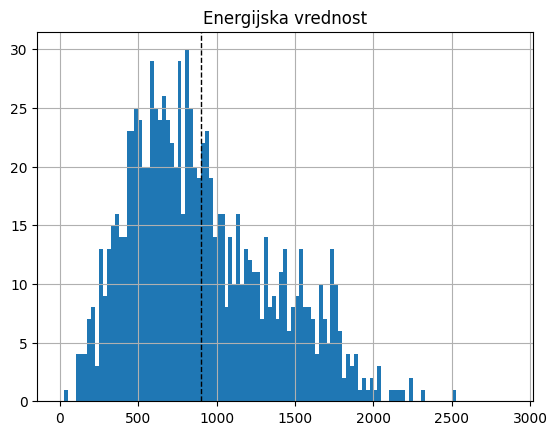

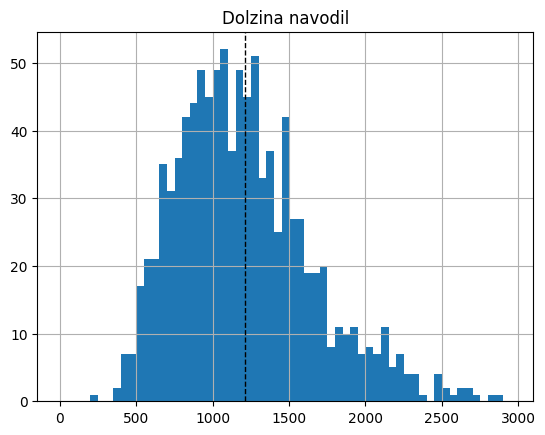

In [65]:
en_mean = recepti["Energijska vrednost"].mean()
recepti.hist("Energijska vrednost", bins = range(1,2900, 25))
plt.axvline(en_mean, color='k', linestyle='dashed', linewidth=1)
print("Povpre[ch]na energijska vrednost je: " + str(float(en_mean)) + " KJ")

dol_mean = recepti["Dolzina navodil"].mean()
recepti.hist("Dolzina navodil",bins = range(1,3000,50))
plt.axvline(dol_mean, color='k', linestyle='dashed', linewidth=1)
print("Povpre[ch]na dol[zh]ina besedila je: " + str(float(dol_mean)) + " znakov")



No pa si poglejmo [sh]e odvisnost med energijsko vrednostjo jedi in njihovimi makronutrienti.

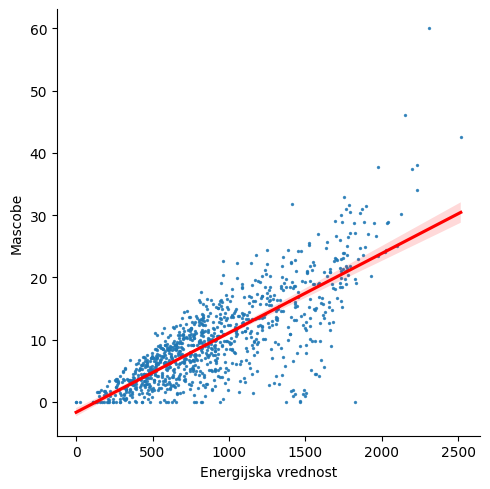

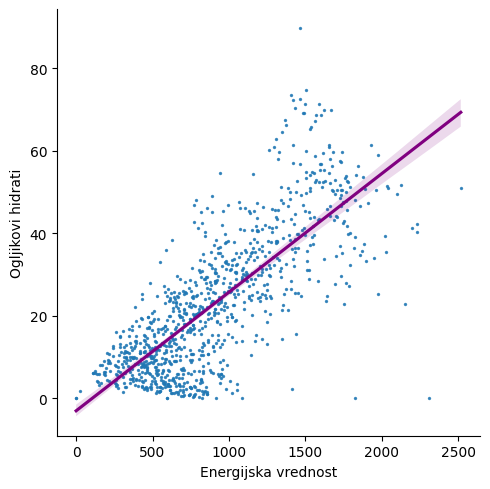

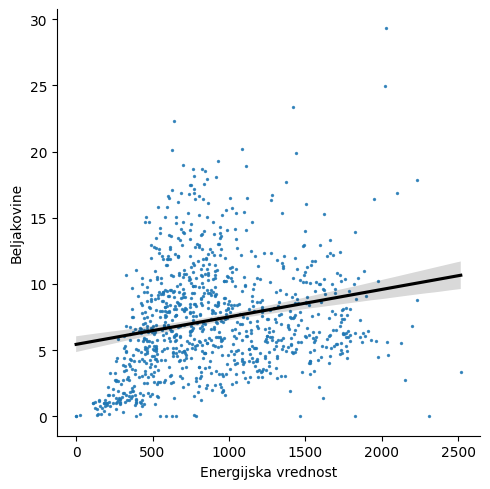

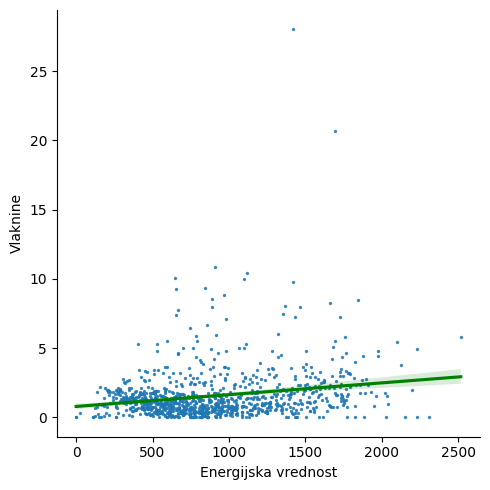

In [83]:
sns.lmplot(x="Energijska vrednost",y="Mascobe",data=recepti,fit_reg=True, line_kws={'color': 'red'},scatter_kws={"s": 2}) 
sns.lmplot(x="Energijska vrednost",y="Ogljikovi hidrati",data=recepti,fit_reg=True, line_kws={'color': 'purple'},scatter_kws={"s": 2}) 
sns.lmplot(x="Energijska vrednost",y="Beljakovine",data=recepti,fit_reg=True, line_kws={'color': 'black'},scatter_kws={"s": 2}) 
sns.lmplot(x="Energijska vrednost",y="Vlaknine",data=recepti,fit_reg=True, line_kws={'color': 'green'},scatter_kws={"s": 2}) 

Opazimo dokaj mo[ch]no pozitivno korelacijo med energijsko vrednostjo in koli[ch]ino ma[sh][ch]ob,ogljikovih hidratov ter do neke mere vlaknin, ki so posebne v tem da jih je v vseh jedeh dokaj malo. Za beljakovine pa je graf dokaj raztresen, tako da v tem primeru linearna regresija ni najbolj uporabna metoda. 

Obrnimo na[sh]o pozornost na dol[zh]ino priprave jedi. Mar so jedi z dalj[sh]im [ch]asom priprave bolj zapletena za pripravo? Morda je [ch]as priprave ponavadi dalj[sh]i od [ch]asa kuhanja?  

Povprecje [ch]asa priprave je: 25.469 min.
Povprecje [ch]asa kuhanja je: 35.502 min.


ValueError: 'light blue' is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

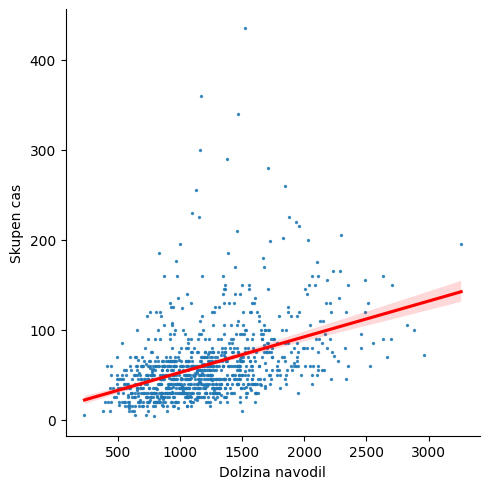

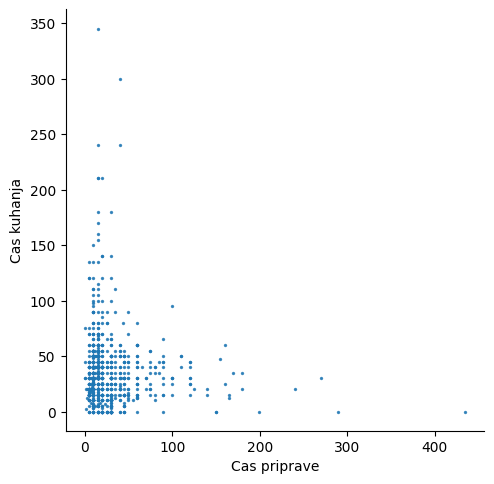

In [95]:
sns.lmplot(x="Dolzina navodil",y="Skupen cas",data=recepti,fit_reg=True, line_kws={'color': 'red'},scatter_kws={"s": 2}) 
print("Povprecje [ch]asa priprave je: " + str(float(recepti["Cas priprave"].mean())) + " min.")
print("Povprecje [ch]asa kuhanja je: " +  str(float(recepti["Cas kuhanja"].mean())) + " min.")
sns.lmplot(x="Cas priprave",y="Cas kuhanja",data=recepti,fit_reg=True, line_kws={'color': "#ADD8E6"},scatter_kws={"s": 2}) 